In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)
from dezero import Variable

## Step29

In [2]:
def rosenbrock(x0, x1):
    y = 100*(x1 - x0 ** 2)**2 + (x0 - 1) ** 2
    return y

In [3]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
x0.grad, x1.grad

(np.float64(-2.0), np.float64(400.0))

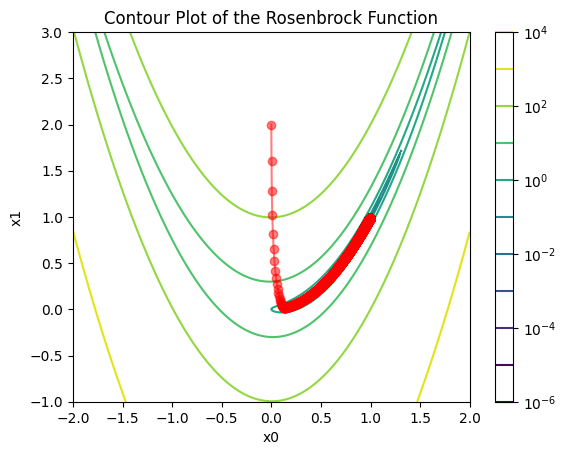

In [4]:
x = np.linspace(-2, 2 ,400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

contour = plt.contour(X, Y, Z, levels=100, cmap='viridis', norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))

plt.title('Contour Plot of the Rosenbrock Function')
plt.xlabel('x0')
plt.ylabel('x1')
plt.colorbar(contour)

lr = 0.001
x0, x1 = (Variable(np.array(0.0)), Variable(np.array(2.0)))
xx0 = [x0.data.item()]
xx1 = [x1.data.item()]

for i in range(10000):
    y = rosenbrock(x0, x1)
    x0.clear_grad()
    x1.clear_grad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad
    xx0.append(x0.data.item())
    xx1.append(x1.data.item())

plt.plot(xx0,xx1, "-or", alpha=0.5)



0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)
10 variable(1.0)
11 variable(1.0)
12 variable(1.0)
13 variable(1.0)
14 variable(1.0)
15 variable(1.0)
16 variable(1.0)
17 variable(1.0)
18 variable(1.0)
19 variable(1.0)
20 variable(1.0)
21 variable(1.0)
22 variable(1.0)
23 variable(1.0)
24 variable(1.0)
25 variable(1.0)
26 variable(1.0)
27 variable(1.0)
28 variable(1.0)
29 variable(1.0)
30 variable(1.0)
31 variable(1.0)
32 variable(1.0)
33 variable(1.0)
34 variable(1.0)
35 variable(1.0)
36 variable(1.0)
37 variable(1.0)
38 variable(1.0)
39 variable(1.0)
40 variable(1.0)
41 variable(1.0)
42 variable(1.0)
43 variable(1.0)
44 variable(1.0)
45 variable(1.0)
46 variable(1.0)
47 variable(1.0)
48 variable(1.0)
49 variable(1.0)
50 variable(1.0)
51 variable(1.0)
52 variable(1.0)
53 variable(1.0)
54 

AttributeError: 'numpy.ndarray' object has no attribute 'backward'

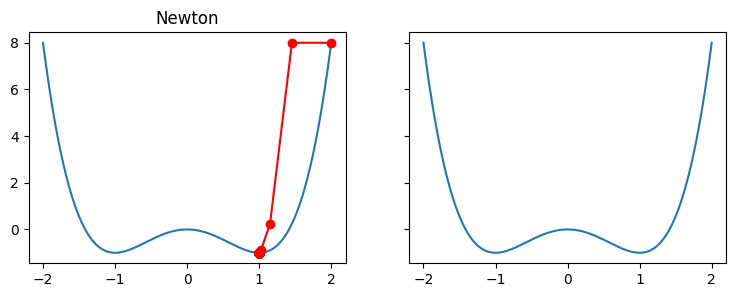

In [26]:
def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

def gx2(x):
    return 12 * x ** 2 - 4

def newton(x0, x1, iters):
    res = [[x0.data.item(), x1.data.item()]]
    for i in range(iters):
        print(i, x0)  
        y = f(x0)
        x0.clear_grad()
        y.backward()
        x0.data -= x0.grad / gx2(x0.data)
        res.append([x0.data.item(), y.data.item()])
    
    return res

def sdg(x0, x1, iters, lr=0.001):
    res = [[x0.data.item(), x1.data.item()]]
    for i in range(iters):
        print(i, x0)
        y = f(x0)
        x0.clear_grad()
        y.backward()
        x0.data -= lr*x0.grad
        res.append([x0.data.item(), y.data.item()])
    
    return res
        
x = np.linspace(-2, 2 ,400)
y = f(x)

flg, ax = plt.subplots(1, 2, figsize=(9,3), sharey=True)
ax[0].plot(x, y)
ax[1].plot(x, y)

x0 = Variable(np.array(2.0))
x1 = Variable(np.array(8.0))

p0 = newton(x0, x1, 1000)
p0 = np.array(p0)
ax[0].plot(p0[:,0], p0[:,1], "-or")
ax[0].set_title('Newton')

p1 = sdg(x0, x1, 1000)
p1 = np.array(p1)
ax[1].plot(p1[:,0], p1[:,1], 'ob')
ax[1].set_title('sgd')

plt.show()
